## How stock_helpers.py's Functions Work

### By: Trinity Lee

In [129]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Importing the libraries

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yahooFinance
import finplot as finplot
from sklearn import preprocessing



### How the Code works
We'll be web scraping the closing prices of a stock on a given day. From here on out any time "raw stock data" is referenced, we mean the unchanged value of the closing prices of a stock, without normalization or any other additional calculations. 

The first thing we can do is set the range of dates we want to scrape

In [131]:
start_date = "2021-04-25"
end_date = "2022-05-09"

Next, for each company/index stock, we create an StockPlot object for them and put then in a list. This allows our data to be organized. The different methods associated with the each StockPlot object allows us to get different permutations of our raw stock data.  

You notice quickly that plotting the Nasdaq & the Tesla stocks on one graph lead to a useless graph because the Nasdaq index's prices are so much larger than the Tesla's stock.

To compare the behavior, we can scale the prices through normalization via the sci kit library which reduces all the values to between 0-1 while preserving the overall behavior/weight of each closing price on that given day. 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


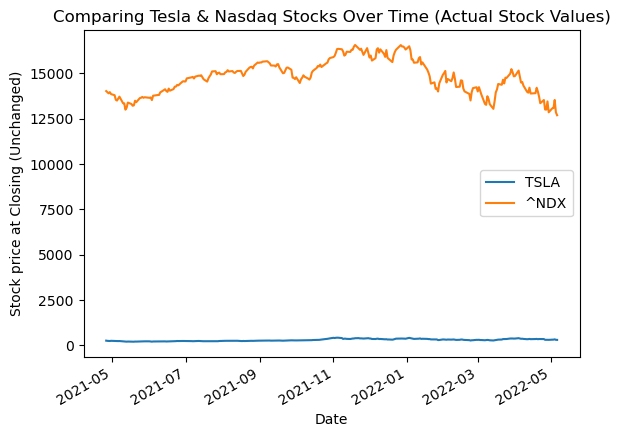

0.05279801179131608
262
0.05842418425089794
262


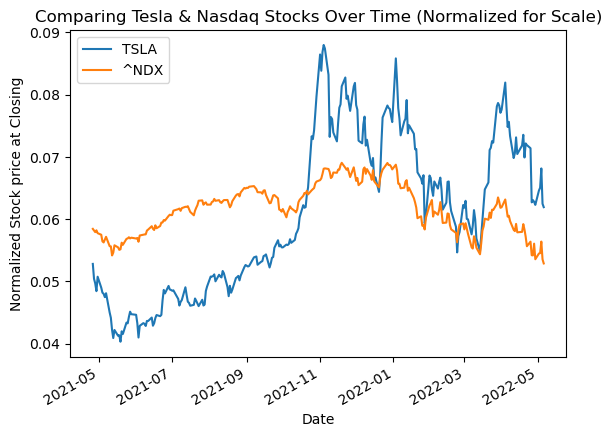

In [132]:

TSLA = StockPlot("TSLA", start_date, end_date)
nasdaq = StockPlot("^NDX", start_date, end_date)


#Storage for organization & easy plotting
list = [TSLA, nasdaq]


#Plot the raw closing prices
for symbol in list:

    symbol.get_stock_data().plot(label=symbol.get_ticker())

plt.ylabel("Stock price at Closing (Unchanged)")
plt.title("Comparing Tesla & Nasdaq Stocks Over Time (Actual Stock Values)")
plt.legend()
plt.show()


#Plot the normalized stock data
for symbol in list:

    symbol.get_normalized_data().plot(label=symbol.get_ticker())

plt.ylabel("Normalized Stock price at Closing")
plt.title("Comparing Tesla & Nasdaq Stocks Over Time (Normalized for Scale)")

plt.legend()
plt.show()


While Figure 1 illustrates that the Nasdaq stock price was larger relative to Tesla's stock closing prices, the normalized data allows draw some interesting conclusions on the overall behavior of each stock in relative to each other. We can see how the Nasdaq stock is a lot more stable overall, but that Tesla's stocks have increased dramatically in price in the recent years. 


Next, we can plot the stock percentage variance between days over this timespan. Percent variance is basically the rate of change between days in a percentage of the previous point. For example, if the stock was 100 on the first day and then 80 on the second, the percentage variance of the second day is -20% from the first day. 

Mathematically it is just (current value - previous value)/ previous value

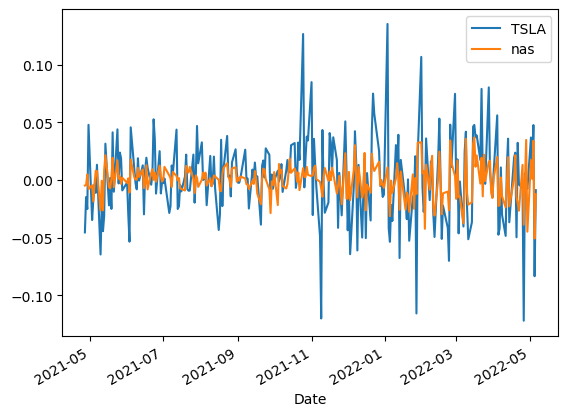

In [133]:
data= TSLA.get_stock_data()



TSLA.get_variance_data().plot(label="TSLA")
nasdaq.get_variance_data().plot(label="nas")

plt.legend()



Since we know that Tesla is a lot more volatile compared to the nasdaq, it isn't surprising that tesla has more extreme percentage variance. 